In [4]:
import numpy as np
from scipy.io import loadmat
import os
import sys
from pathlib import Path

import numpy as np
import tensorflow as tf
import scipy.io
from keras import backend as K
from keras.layers import Activation
from tensorflow.keras.utils import get_custom_objects
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize, LogNorm


module_path = str(Path(os.path.abspath('')).parent)
if module_path not in sys.path:
    sys.path.append(module_path)
    
from functions.sac_modular import *
from functions.target_systems import *
from functions.RNCRN_tools import * 
from functions.RNCRN_phase_plane import *
from functions.create_attractors_tools import * 

from functions.RNCRN_train import * 
from functions.create_chimera_tools import * 
from functions.RNCRN_phase_line import * 

In [5]:
# target classification function for setting colour in correct regions 
def band_range(x1, true_out=0.1, false_out=1):
    if x1 > 2.5:
        return true_out
    else:
        return false_out

In [6]:
# load classify subsystems
classify_filename = r'models/example_classify_subsystem'

# extract weights of the model
matcontents = scipy.io.loadmat(classify_filename+'.mat')
first_layer_weights = matcontents['first_layer_weights']
first_layer_biases = matcontents['first_layer_biases'][0]
output_layer_weights = matcontents['output_layer_weights']
output_layer_biases = matcontents['output_layer_biases'][0]
N = len(matcontents['first_layer_biases'][0])
gamma = matcontents['gamma'][0][0]
alpha = 1

kernel_initializer_first = tf.keras.initializers.constant(matcontents['first_layer_weights'])
bias_initializer_first = tf.keras.initializers.constant(matcontents['first_layer_biases'][0])
kernel_initializer_second = tf.keras.initializers.constant(matcontents['output_layer_weights'])
bias_initializer_second = tf.keras.initializers.constant(matcontents['output_layer_biases'][0])

print('--gamma--')
print(gamma)
print('--first_layer_weights--')
for val in first_layer_weights[0]:
    print(f'{val:.3f}', '\\\\')
    
print('--first_layer_biases--')
for val in first_layer_biases:
    print(f'{val:.3f}', '\\\\')
    
print('--output_layer_weights--')
for val in output_layer_weights:
    print(f'{val[0]:.3f}', '\\\\')

print('--output_layer_biases--')
for val in output_layer_biases:
    print(f'{val:.3f}', '\\\\')


--gamma--
1
--first_layer_weights--
-3.899 \\
-4.832 \\
-5.089 \\
--first_layer_biases--
10.786 \\
11.864 \\
12.527 \\
--output_layer_weights--
5.960 \\
-5.255 \\
-7.505 \\
--output_layer_biases--
0.436 \\


In [8]:
# sets intervals of input-output classify function
lower_limit_x = 0
lower_limit_y = 0
upper_limit_x = 6
upper_limit_y = 6
step_size = 0.01;

# computes quasi-static vector field for different states of the classify
x1_train = np.arange(lower_limit_x, upper_limit_x, step_size, dtype="float32")
x_train = x1_train

def smooth_max_activation(x):
    return 0.5*(x + K.sqrt(K.square(x)+4*gamma*alpha))/alpha
get_custom_objects().update({'smooth_max_activation': Activation(smooth_max_activation)})

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(1,), name=''),
  tf.keras.layers.Dense(N, activation='smooth_max_activation', kernel_initializer=kernel_initializer_first, bias_initializer=bias_initializer_first),
  tf.keras.layers.Dense(1, activation='smooth_max_activation', kernel_initializer = kernel_initializer_second, bias_initializer=bias_initializer_second),
])

y_pred = model.predict(x_train)
y_vals = y_pred.reshape(len(y_pred),1)

19/19 [==============================] - 0s 891us/step


In [9]:
# load parametrized RNCRN
filename_toggle = r'models/example_para_RNCRN'

# unpacks the parameters from the file
params_toggle, number_of_exec_species_toggle, number_chemical_perceptrons_toggle, number_of_static_exec_species_toggle = unpack_mat_model_static_exec(filename_toggle+'.mat')
alpha_mat, omega_mat, bias_vec, beta_vec, gamma_vec, tau_vec, static_omega_mat = params_toggle

# sets intervals of executive species compact subsets (i.e. K_1)
lower_limit = 0
upper_limit = 3
step_size = 0.2

# creates a meshgrid of states for the quasi-static vector field
inputs, data_shape = create_state_space_2D_array(lower_limit, upper_limit, step_size )
inputs_plot = array2D_to_meshgrid(inputs, data_shape)

# computes the quasi-static vector field for different parameter species inputs
quasi_static_vector_field_a = compute_quasi_static_vector_field_over_state_space_static_exec(inputs, np.array([[1]]), alpha_mat, omega_mat, bias_vec, beta_vec, gamma_vec, tau_vec, static_omega_mat)
quasi_static_vector_field_b = compute_quasi_static_vector_field_over_state_space_static_exec(inputs, np.array([[0.1]]), alpha_mat, omega_mat, bias_vec, beta_vec, gamma_vec, tau_vec, static_omega_mat)

# state parameters for Appendix
print('--BETAs--')
for val in beta_vec:
    print(f'{val[0]:.3f}', '\\\\')
    
print('--GAMMAs--')
# state parameters for Appendix
for val in gamma_vec:
    print(f'{val[0]:.3f}', '\\\\')
    
print('--TAU--')
# state parameters for Appendix
for val in tau_vec:
    print(f'{val[0]:.3f}', '\\\\')
    
print('--PSI--')
# state parameters for Appendix
for val in static_omega_mat:
    print(f'{val[0]:.3f}', '\\\\')
    
print('--BIAS--')
# state parameters for Appendix
for val in bias_vec:
    print(f'{val[0]:.3f}', '\\\\')
    
print('--ALPHA 1--')
# state parameters for Appendix
for val in alpha_mat[0,:]:
    print(f'{val:.3f}', '\\\\')
    
print('--ALPHA 2--')
# state parameters for Appendix
for val in alpha_mat[1,:]:
    print(f'{val:.3f}', '\\\\')
    
print('--OMEGA 1--')
# state parameters for Appendix
for val in omega_mat[:,0]:
    print(f'{val:.3f}', '\\\\')

print('--OMEGA 2--')
# state parameters for Appendix
for val in omega_mat[:,1]:
    print(f'{val:.3f}', '\\\\')

In [8]:
# draws the target dynamical data used in training

# target A
# sets intervals of executive species compact subsets (i.e. K_1)
lower_limit = 0.01
upper_limit = 3
step_size = 0.2

# sets the custom 2D equilibrium target ODE 
def target_dynamics_a(x, a):
    return a - x

# creates a meshgrid of values from the ODE
x12_train = np.arange(lower_limit, upper_limit + step_size, step_size )
xv1, xv2 = np.meshgrid(x12_train, x12_train, indexing='ij')

# converts training data into JAX format
inputs_a = jnp.array([xv1.flatten(),
                    xv2.flatten()])
targets_a = target_dynamics_a(inputs_a, 0.5)

# formats data for plotting
res_input_a = np.transpose(inputs_a)
res_targets_a = np.transpose(targets_a)

# target A
# Invokes the code for Algorithm 1 (to generate limit cycle vector field)
# sets the parameter \delta
distance = 0.01

# sets the parameter \eta
magnitude = 1

# sets the parameter K (number of padding points)
number_of_padding_each_side = 20

# sets the interval of the variable that is used in the parametric equation to create a line of points 
low_parametric = 0
upper_parametric = 2*np.pi
step_parametric = 0.01

# calls a function that implements Algorithm 1 
parametric_circle = lambda x : parametric_concentric_circle(x, 1, 1.5)
inputs_b, targets_b = draw_attractor_parametric(parametric_circle, low_parametric, upper_parametric, step_parametric, distance, magnitude, number_of_padding_each_side)

# formats data for plotting
res_input_b = np.transpose(inputs_b)
res_targets_b = np.transpose(targets_b)

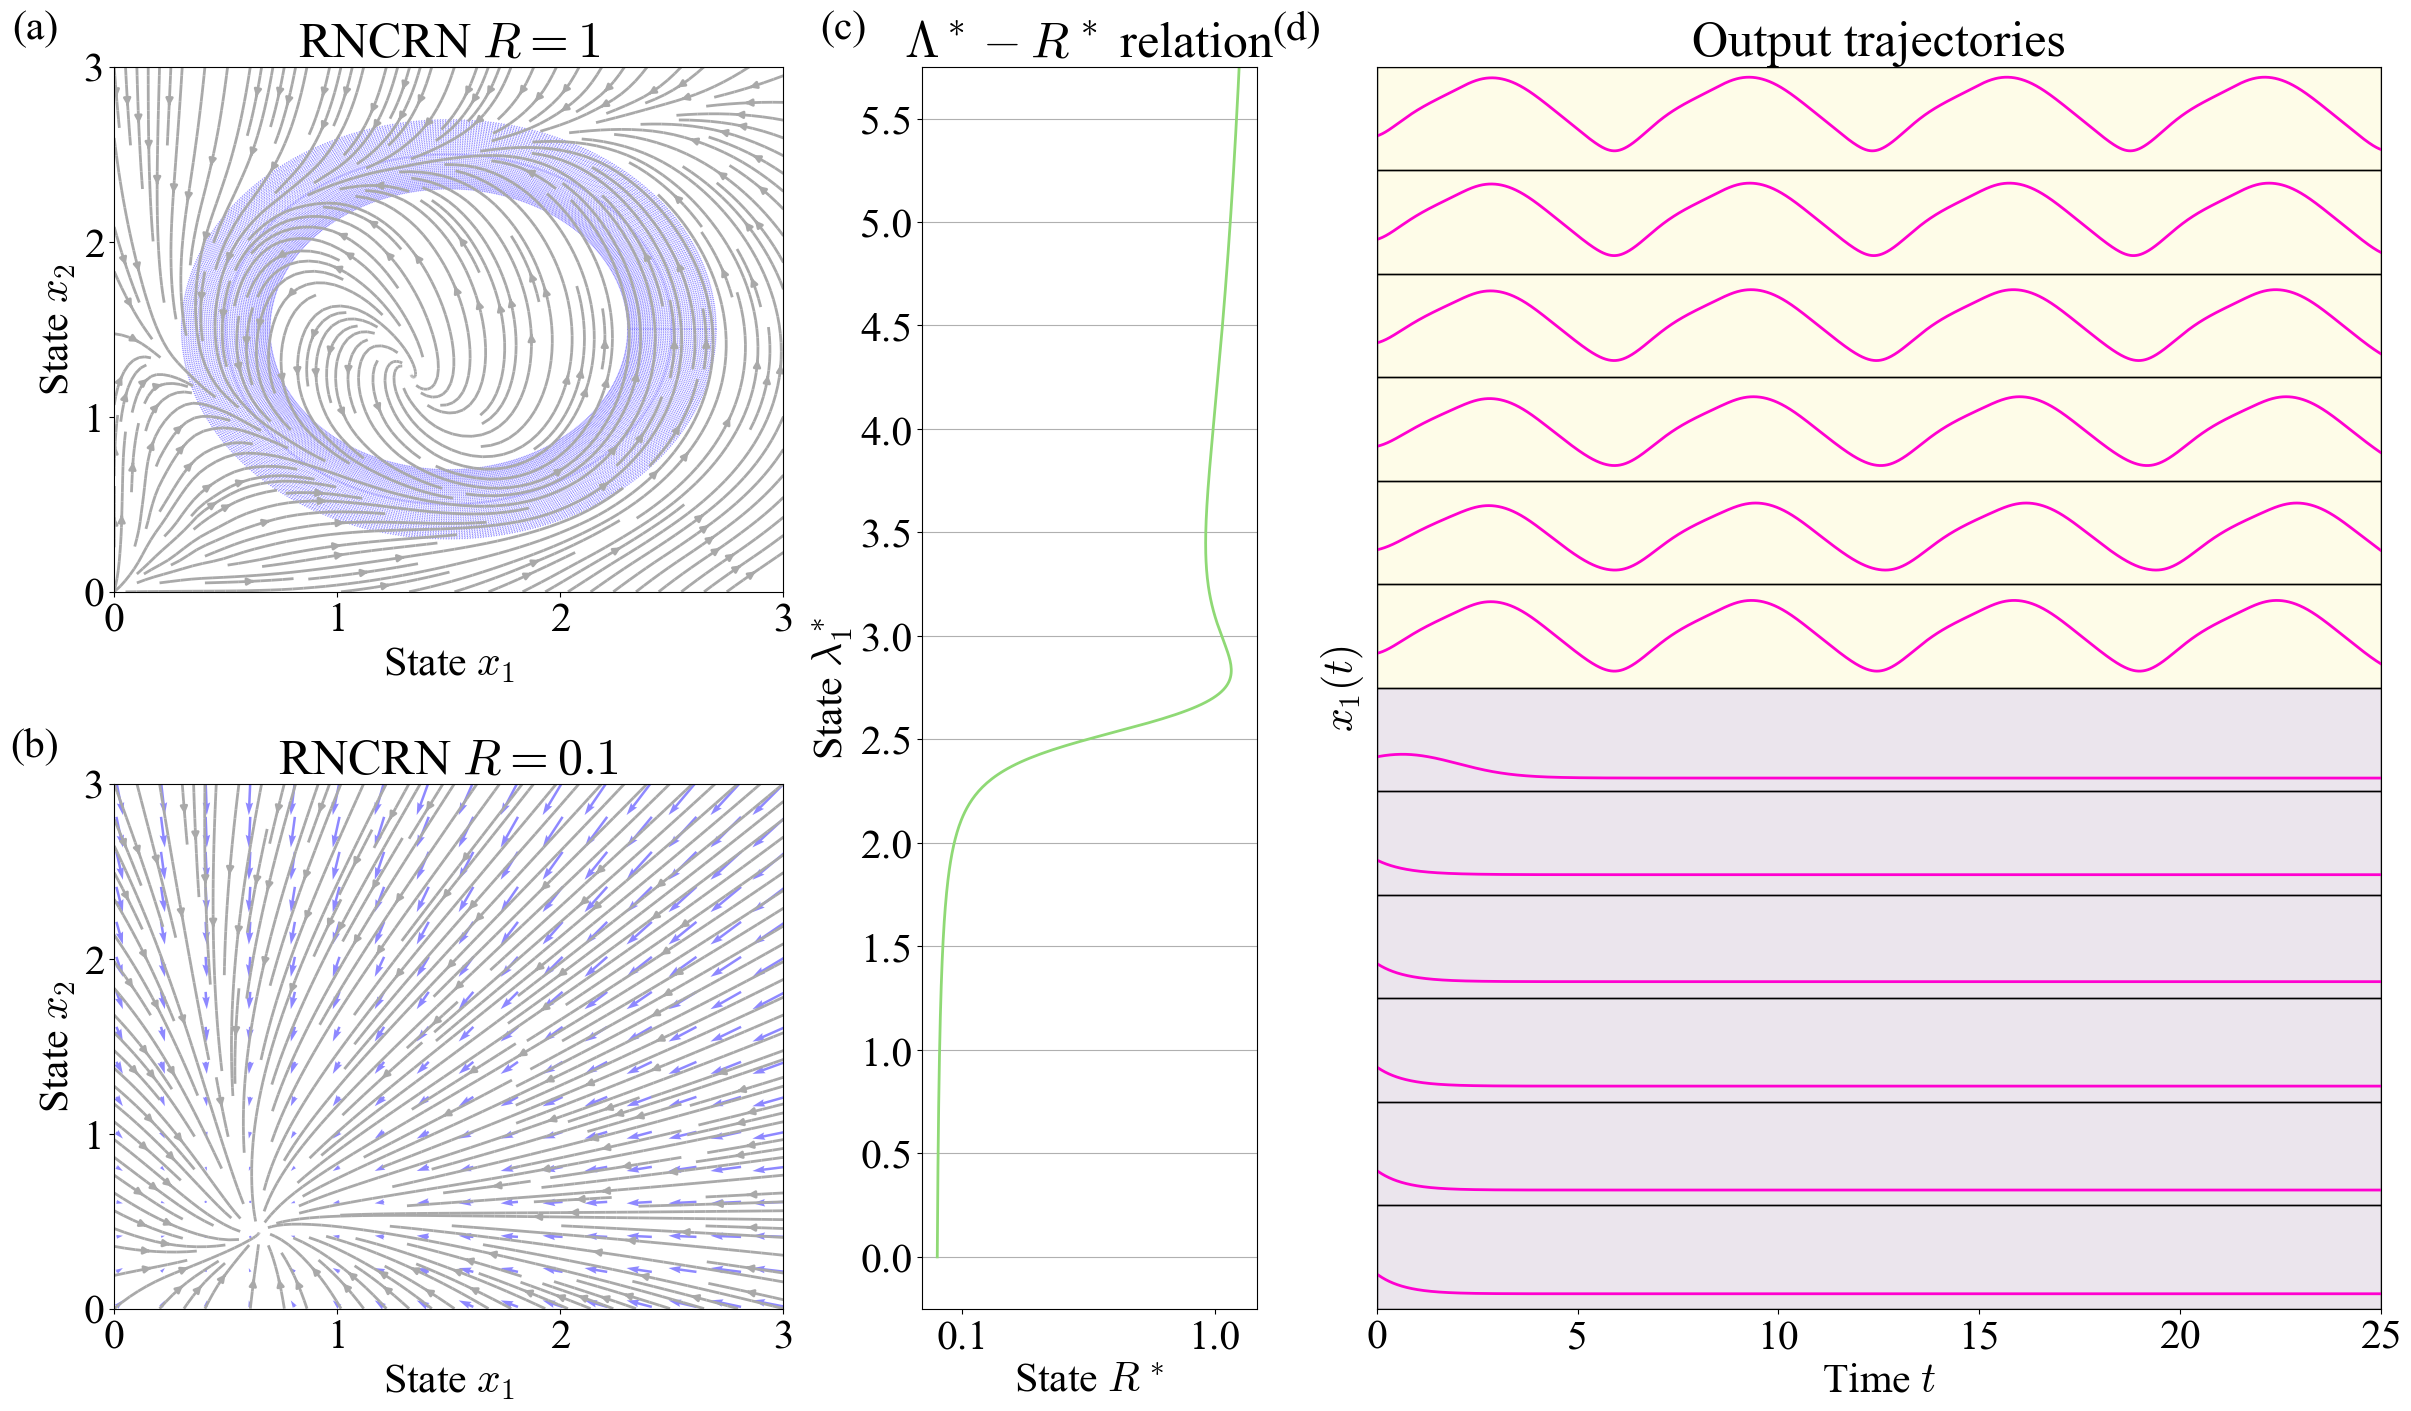

In [9]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['font.size'] = 30
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.serif'] = 'Times New Roman'
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['font.family'] = 'serif'
plt.rcParams['axes.prop_cycle'] = cycler(alpha=[1])
mpl.rcParams['figure.figsize'] = [20 , 12]
mpl.rcParams['text.usetex'] = False
mpl.rcParams['legend.edgecolor'] = 'k'
mpl.rcParams['legend.framealpha'] = 0
mpl.rcParams['legend.fancybox'] = True
ColList = ['#1F13FF','#FF00D0', '#2A2A72', '#A9A9A9', '#8FD975']

mpl.rcParams['figure.figsize'] = [24, 14]

vals = np.arange(0, 6.0, 0.5)
num_graphs = len(vals)
tFinal = 25

first_include = 0
last_include = 11
mid = 6
nums = 0 

res = [['(a)', '(c)', '(d)'], ['(b)', '(c)', '(d)'] ]

fig, axs = plt.subplot_mosaic(res, layout='constrained', gridspec_kw={'width_ratios':[1,0.5, 1.5], 'height_ratios':np.ones(2)} )
for label, ax in axs.items():
    # label physical distance to the left and up:
    trans = mtransforms.ScaledTranslation(-40/72, 14/72, fig.dpi_scale_trans)       
    if  label.startswith('('):       
        ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
               fontsize='medium', va='bottom', fontfamily='serif', ha='right')
    elif label == '11':
        ax.text(0.0, 1.0, '(d)', transform=ax.transAxes + trans,
               fontsize='medium', va='bottom', fontfamily='serif', ha='right')
        

cmap_obj = cm.get_cmap('viridis', 12)
normalizer = LogNorm(vmin=1e-3, vmax=1) 
im = cm.ScalarMappable(norm=normalizer)
upper_limit = 0

upp_fill = 0 
low_fill = 3
for i in np.arange(first_include, last_include+1, 1):
    axb = axs['(d)']
    lambda_1 = vals[i]
    
    col_val = band_range(lambda_1, true_out=0.93148434, false_out=0)
    
    try:
        t_low = np.load('data/sol_rncrn_low_t_i'+str(i)+'.npy')
        y_low = np.load('data/sol_rncrn_low_y_i'+str(i)+'.npy')
        axb.plot(t_low,y_low+3*i, color=ColList[1], linestyle='-', )
    except:
        print('Cannot find i=' +str(i))
    
    axb.fill([0, 0, tFinal, tFinal], [low_fill*i, low_fill*(i+1), low_fill*(i+1), low_fill*i], color = cmap_obj(col_val), alpha=0.1, edgecolor='None')
    axb.fill([0, 0, tFinal, tFinal], [low_fill*i, low_fill*(i+1), low_fill*(i+1), low_fill*i], color = 'None', edgecolor='k')

    
axb.set_yticks([])
axb.set_xlim(0,tFinal)
axb.set_ylim(0, 3*(i+1))
axb.set_title('Output trajectories')
axb.set_xlabel('Time $t$')
axb.set_ylabel('$x_1(t)$')

ax = axs['(c)']
grad = 33/5.5
ax.plot(y_vals, 1.5+grad*x_train, ColList[4], linewidth=2)

ax.set_ylim([0, 3*(i+1)])
ax.set_yticks(np.arange(1.5, 36, 3))
ax.set_yticklabels([str(val) for val in vals])

for i in np.arange(first_include, last_include+1, 1):
    lambda_1 = vals[i]
    col_val = band_range(lambda_1, true_out=0.93148434, false_out=0)

ax.set_ylabel('State $\lambda_1^*$')
ax.set_xlabel('State $R^*$')
ax.set_xticks([0.1, 1])
ax.set_title('$\Lambda^*-R^*$ relation')
ax.grid(axis='y')

lower_limit = 0
upper_limit = 3

axa = axs['(a)']
quasi_static_vector_field_plot = array2D_to_meshgrid(quasi_static_vector_field_a, data_shape)
axa.streamplot(np.transpose(inputs_plot[0,:,:]), np.transpose(inputs_plot[1,:,:]),
               np.transpose(quasi_static_vector_field_plot[0,:,:]), np.transpose(quasi_static_vector_field_plot[1,:,:]), 
               arrowstyle='-|>', color=ColList[3], linewidth=2, density=2)
axa.set_xlim(lower_limit, upper_limit)
axa.set_ylim(lower_limit, upper_limit)
axa.set_title('RNCRN $R=1$')
axa.set_xlabel('State $x_1$')
axa.set_ylabel('State $x_2$')
axa.set_xticks([0,1,2,3])
axa.set_yticks([0,1,2,3])
axa.quiver(res_input_b[:,0], res_input_b[:,1], res_targets_b[:,0], res_targets_b[:,1], color=ColList[0], alpha=0.5)

axb = axs['(b)']
quasi_static_vector_field_plot = array2D_to_meshgrid(quasi_static_vector_field_b, data_shape)
axb.streamplot(np.transpose(inputs_plot[0,:,:]), np.transpose(inputs_plot[1,:,:]),
               np.transpose(quasi_static_vector_field_plot[0,:,:]), np.transpose(quasi_static_vector_field_plot[1,:,:]), 
               arrowstyle='-|>', color=ColList[3], linewidth=2, density=2)
axb.set_xlim(lower_limit, upper_limit)
axb.set_ylim(lower_limit, upper_limit)
axb.set_xticks([0,1,2,3])
axb.set_yticks([0,1,2,3])
axb.set_title('RNCRN $R=0.1$')
axb.set_xlabel('State $x_1$')
axb.set_ylabel('State $x_2$')
axb.quiver(res_input_a[:,0], res_input_a[:,1], res_targets_a[:,0], res_targets_a[:,1], color=ColList[0], alpha=0.5)


plt.show()
fig.savefig('figures/data_def_piecewise_eq_cycle.pdf', bbox_inches='tight')